<a href="https://colab.research.google.com/github/adfhsjt/PCVK25_3F_02/blob/main/Week5_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Ahmad Dzul Fadhli Hannan
# Nomor : 02
# Kelas : TI-3F

# Praktikum

## D-1 PERCOBAAN HISTOGRAM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

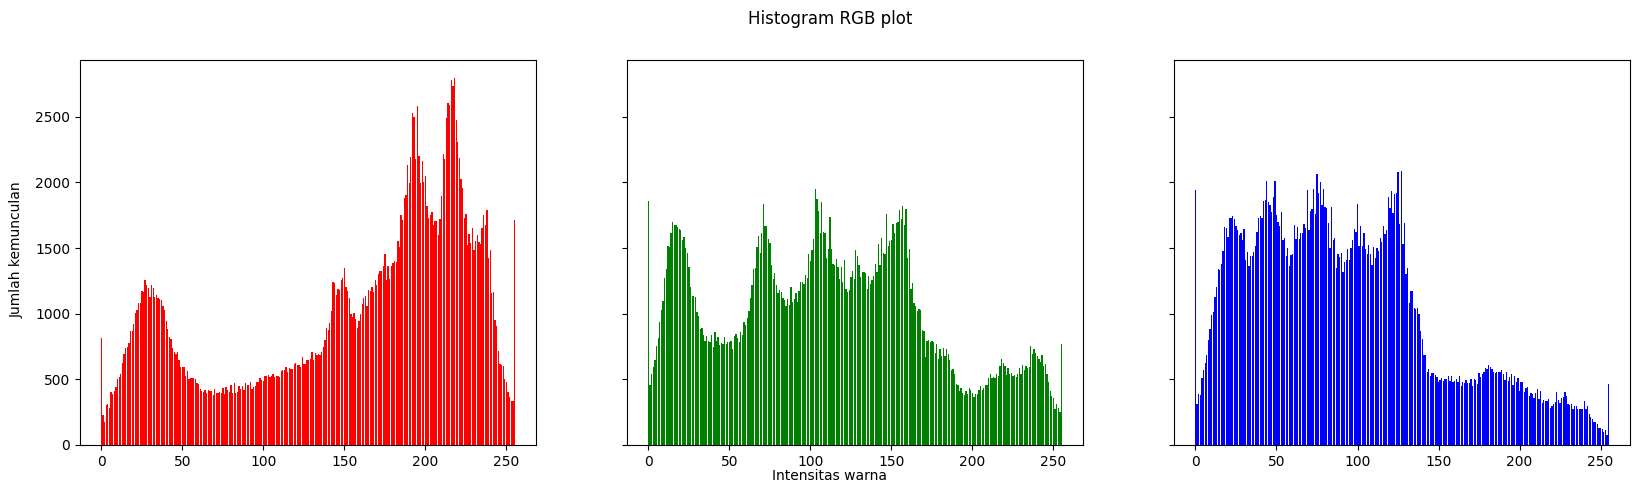

In [ ]:
#membuat histogram image (manual)
img= cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lena.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red= [0]*256
green= [0]*256
blue= [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names= np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

## Pertanyaan D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

<BarContainer object of 256 artists>

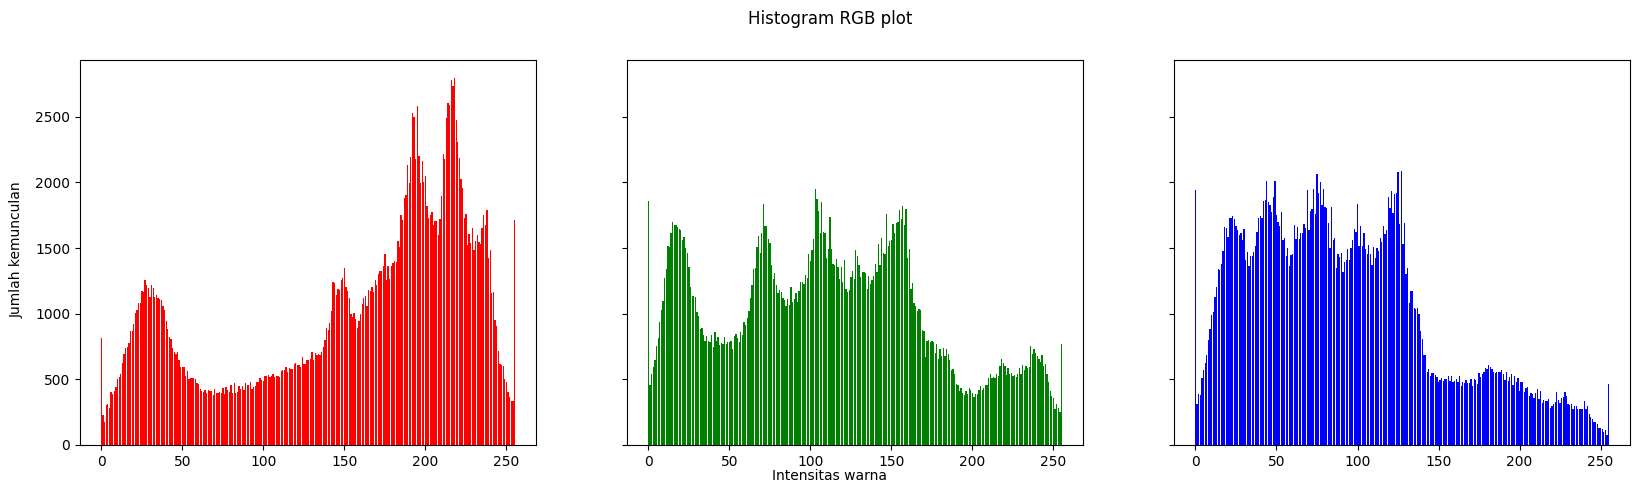

In [ ]:
red, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))
green, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))
blue, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))

names = np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

Outputnya sama.

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung gelap, terang, atau kontras rendah.

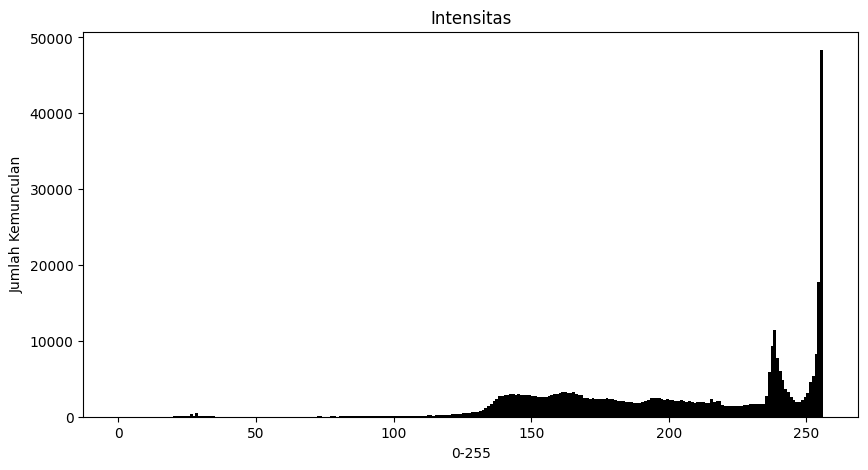

In [ ]:
img= cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/KTM lama.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,5))
plt.hist(img.ravel(), bins=256, range=(0,256), color='black')
plt.title('Intensitas')
plt.xlabel('0-255')
plt.ylabel('Jumlah Kemunculan')
plt.show()


Jika dilihat dari distribusi yang terpusat menandakan kontras gambar kurang. Dan jika dilihat dari intensitas gelap terang, pixel 255 memiliki jumlah kemunculan yang sangat banyak menandakan intensitas gambar lebih ke gelap.

## D-2 PERCOBAAN HISTOGRAM EQUALIZATION

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilangambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

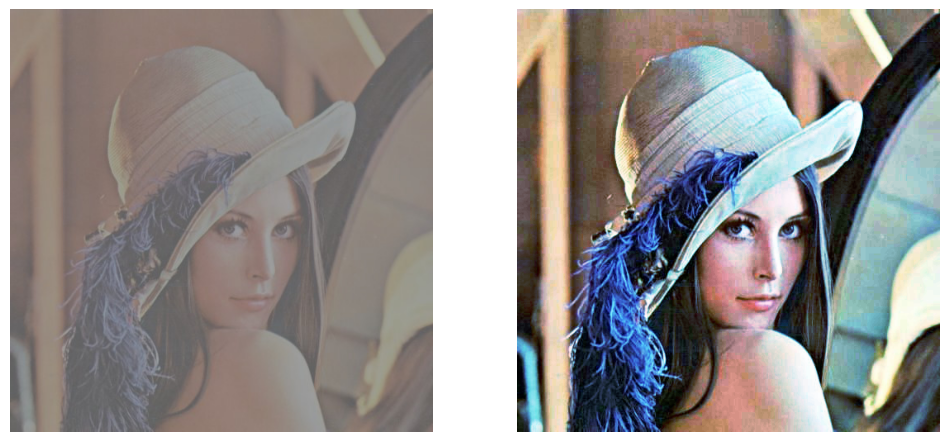

<Figure size 1000x400 with 0 Axes>

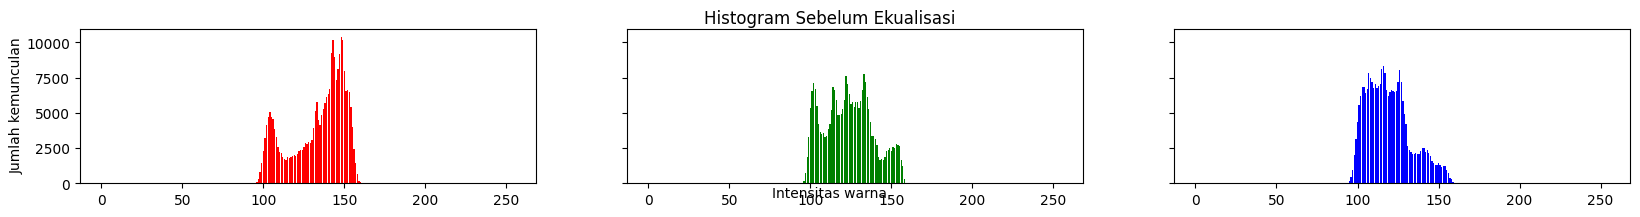

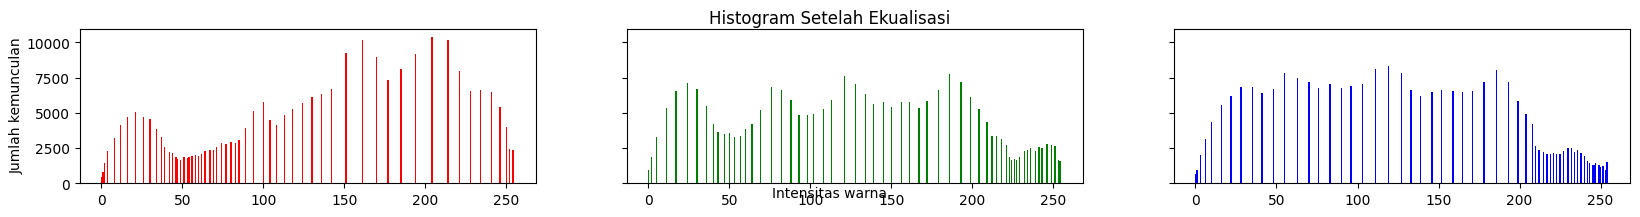

In [45]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lena_lc.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red= [0]*256
green= [0]*256
blue= [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

cdf_r = np.cumsum(red)
cdf_g = np.cumsum(green)
cdf_b = np.cumsum(blue)

norm_cdf_r = ((cdf_r - cdf_r[0]) * 255 / (cdf_r[-1] - cdf_r[0])).astype(np.uint8)
norm_cdf_g = ((cdf_g - cdf_g[0]) * 255 / (cdf_g[-1] - cdf_g[0])).astype(np.uint8)
norm_cdf_b = ((cdf_b - cdf_b[0]) * 255 / (cdf_b[-1] - cdf_b[0])).astype(np.uint8)

img_eq = np.zeros_like(img)
for y in range(height):
    for x in range(width):
        r, g, b = img[y, x]
        img_eq[y, x, 0] = norm_cdf_r[r]
        img_eq[y, x, 1] = norm_cdf_g[g]
        img_eq[y, x, 2] = norm_cdf_b[b]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.axis('off')

plt.figure(figsize=(10,4))
names= np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,2], sharex=True, sharey=True)
fig.suptitle('Histogram Sebelum Ekualisasi')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

height, width, depth = np.shape(img_eq)
names = np.arange(256)

red= [0]*256
green= [0]*256
blue= [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img_eq[y][x][0]] += 1
    green[img_eq[y][x][1]] += 1
    blue[img_eq[y][x][2]] += 1

names= np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,2], sharex=True, sharey=True)
fig.suptitle('Histogram Setelah Ekualisasi')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapimenggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada potongan kode berikut ini.

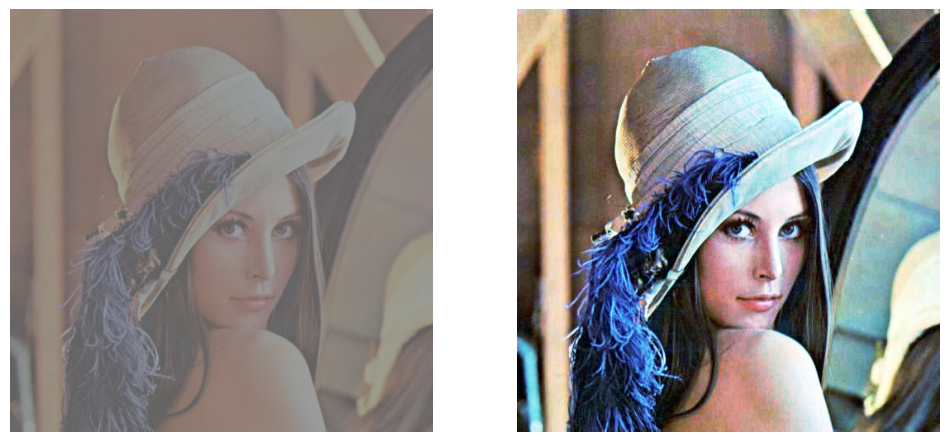

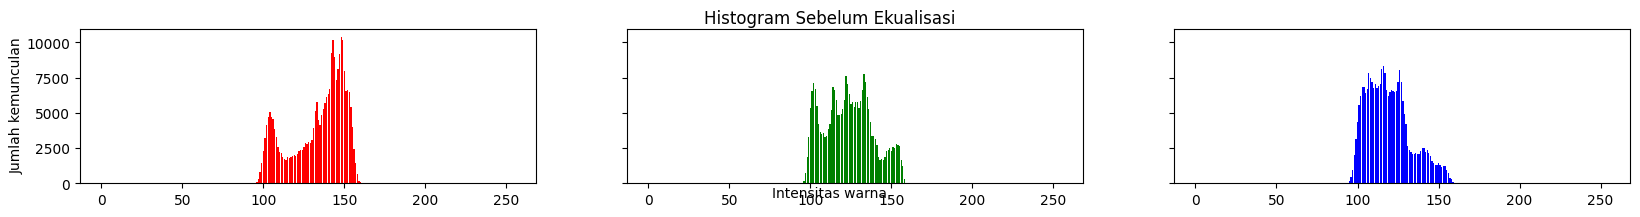

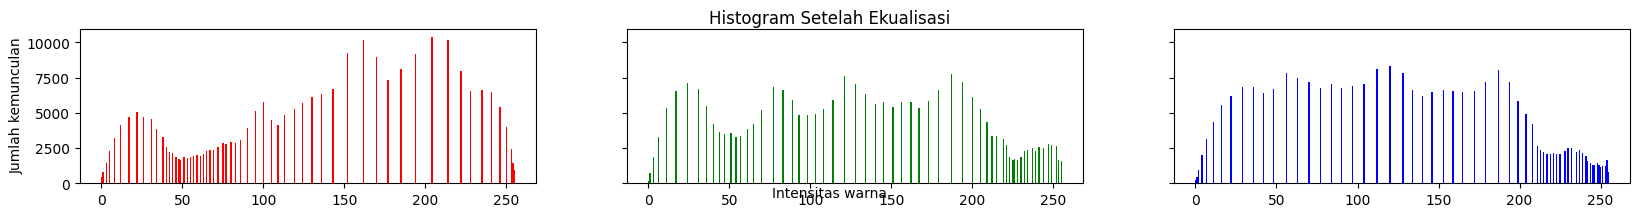

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3F_02/Images/lena_lc.jpg')
img= cv.cvtColor(img, cv.COLOR_BGR2RGB)

red, green, blue = cv.split(img)

red_eq = cv.equalizeHist(red)
green_eq = cv.equalizeHist(green)
blue_eq = cv.equalizeHist(blue)

img_eq = cv.merge((red_eq, green_eq, blue_eq))


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.axis('off')

height_img, width_img, depth_img = np.shape(img)
height_img_eq, width_img_eq, depth_img_eq = np.shape(img_eq)

red_img = [0]*256
green_img = [0]*256
blue_img = [0]*256

red_img_eq = [0]*256
green_img_eq = [0]*256
blue_img_eq = [0]*256

for y in range(0, height_img):
  for x in range(0, width_img):
    red_img[img[y][x][0]] += 1
    green_img[img[y][x][1]] += 1
    blue_img[img[y][x][2]] += 1

for y in range(0, height_img_eq):
  for x in range(0, width_img_eq):
    red_img_eq[img_eq[y][x][0]] += 1
    green_img_eq[img_eq[y][x][1]] += 1
    blue_img_eq[img_eq[y][x][2]] += 1

names= np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,2], sharex=True, sharey=True)
fig.suptitle('Histogram Sebelum Ekualisasi')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red_img, color='red')
axs[1].bar(names, green_img, color='green')
axs[2].bar(names, blue_img, color='blue')

fig, axs = plt.subplots(1,3, figsize=[20,2], sharex=True, sharey=True)
fig.suptitle('Histogram Setelah Ekualisasi')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas warna', ha='center')
axs[0].bar(names, red_img_eq, color='red')
axs[1].bar(names, green_img_eq, color='green')
axs[2].bar(names, blue_img_eq, color='blue')

plt.show()


Hasilnya sama seperti langkah 1.